In [18]:
# import libraries
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model

In [19]:
class GlobalConfig:
    train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
    test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'
    class_names = {
            'Normal':0,
            'Covid':1,
            'Viral':2
    }

In [20]:
config = GlobalConfig()
batch_size=8

In [21]:
type(config.train_path)

str

In [22]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    config.train_path,
    image_size=(256,256),
    batch_size=8
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    config.test_path,
    image_size=(256,256),
    batch_size=batch_size
)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [25]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(3,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [26]:
alexnet_model = AlexNet((256,256,3))

In [27]:
alexnet_model.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 62, 62, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 62, 62, 96)        384       
                                                                 
 activation_5 (Activation)   (None, 62, 62, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 30, 30, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 30, 30, 256)       1024

In [28]:
alexnet_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     metrics=['accuracy'])

In [29]:
history = alexnet_model.fit(train_ds,
                            epochs=25)

Epoch 1/25
32/32 [==============================] - 45s 1s/step - loss: 17.8428 - accuracy: 0.5538
Epoch 2/25
32/32 [==============================] - 42s 1s/step - loss: 0.7577 - accuracy: 0.8008
Epoch 3/25
32/32 [==============================] - 42s 1s/step - loss: 0.6105 - accuracy: 0.7809
Epoch 4/25
32/32 [==============================] - 42s 1s/step - loss: 0.3821 - accuracy: 0.9044
Epoch 5/25
32/32 [==============================] - 42s 1s/step - loss: 0.3106 - accuracy: 0.9004
Epoch 6/25
32/32 [==============================] - 42s 1s/step - loss: 0.4342 - accuracy: 0.8566
Epoch 7/25
32/32 [==============================] - 42s 1s/step - loss: 0.3223 - accuracy: 0.8884
Epoch 8/25
32/32 [==============================] - 42s 1s/step - loss: 0.3393 - accuracy: 0.9004
Epoch 9/25
32/32 [==============================] - 42s 1s/step - loss: 0.2457 - accuracy: 0.9283
Epoch 10/25
32/32 [==============================] - 42s 1s/step - loss: 0.1648 - accuracy: 0.9482
Epoch 11/25
32/32 

<Axes: >

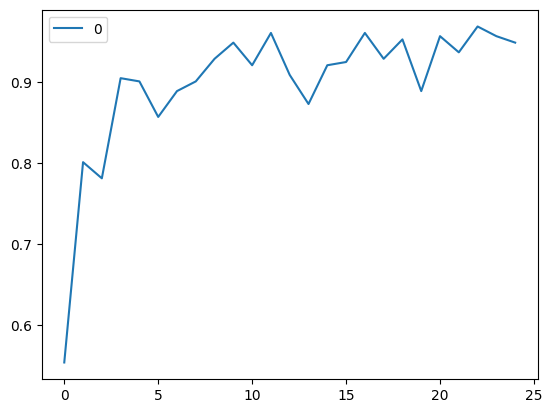

In [32]:
import pandas as pd

pd.DataFrame(history.history['accuracy']).plot()

In [33]:
alexnet_model.evaluate(test_ds)

9/9 [==============================] - 2s 187ms/step - loss: 0.6132 - accuracy: 0.8333


[0.613153338432312, 0.8333333134651184]